In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.metrics import silhouette_samples, silhouette_score

In [137]:
!wget https://raw.githubusercontent.com/rajdeepmondal1/customer-segmentation/main/500000_sales_records.csv

--2022-04-19 05:19:14--  https://raw.githubusercontent.com/rajdeepmondal1/customer-segmentation/main/500000_sales_records.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61902018 (59M) [text/plain]
Saving to: ‘500000_sales_records.csv.1’

500000_sales_record 100%[===================>]  59.03M  95.2MB/s    in 0.6s    

2022-04-19 05:19:14 (95.2 MB/s) - ‘500000_sales_records.csv.1’ saved [61902018/61902018]



In [138]:
df = pd.read_csv('/content/500000_sales_records.csv')

In [139]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,5/17/2017,880811536,7/2/2017,562,109.28,35.84,61415.36,20142.08,41273.28
4,Europe,Slovakia,Beverages,Offline,L,10/26/2016,174590194,12/4/2016,3973,47.45,31.79,188518.85,126301.67,62217.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,Asia,Myanmar,Fruits,Offline,L,1/16/2015,134026181,2/18/2015,180,9.33,6.92,1679.40,1245.60,433.80
499996,Australia and Oceania,New Zealand,Office Supplies,Online,H,1/22/2011,987753570,2/1/2011,7086,651.21,524.96,4614474.06,3719866.56,894607.50
499997,Europe,Lithuania,Snacks,Online,C,1/25/2017,766976869,1/26/2017,4354,152.58,97.44,664333.32,424253.76,240079.56
499998,Asia,Malaysia,Beverages,Offline,H,3/13/2016,537369906,3/18/2016,8552,47.45,31.79,405792.40,271868.08,133924.32


In [140]:
df.rename(columns = {'Region':'region', 'Country':'country', 'Item Type':'item_type',
                     'Sales Channel':'sales_channel', 'Order Priority':'order_priority',
                     'Order Date':'order_date', 'Order ID':'order_id', 'Ship Date':'ship_date',
                     'Units Sold':'units_sold', 'Unit Price':'unit_price', 'Unit Cost':'unit_cost',
                     'Total Revenue':'total_revenue', 'Total Cost':'total_cost', 'Total Profit':'total_profit'}, inplace = True)

In [141]:
df.head()

,region,country,item_type,sales_channel,order_priority,order_date,order_id,ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,5/17/2017,880811536,7/2/2017,562,109.28,35.84,61415.36,20142.08,41273.28
4,Europe,Slovakia,Beverages,Offline,L,10/26/2016,174590194,12/4/2016,3973,47.45,31.79,188518.85,126301.67,62217.18


In [142]:
df = df.drop(['order_date', 'order_id', 'ship_date'], axis=1)

In [143]:
df.shape[0], df.shape[1]

(500000, 11)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   region          500000 non-null  object 
 1   country         500000 non-null  object 
 2   item_type       500000 non-null  object 
 3   sales_channel   500000 non-null  object 
 4   order_priority  500000 non-null  object 
 5   units_sold      500000 non-null  int64  
 6   unit_price      500000 non-null  float64
 7   unit_cost       500000 non-null  float64
 8   total_revenue   500000 non-null  float64
 9   total_cost      500000 non-null  float64
 10  total_profit    500000 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 42.0+ MB


In [145]:
df.isnull().sum()

region            0
country           0
item_type         0
sales_channel     0
order_priority    0
units_sold        0
unit_price        0
unit_cost         0
total_revenue     0
total_cost        0
total_profit      0
dtype: int64

In [146]:
df.describe()

,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit
count,500000.000000,500000.000000,500000.000000,5.000000e+05,5.000000e+05,5.000000e+05
mean,4999.136110,266.036748,187.528564,1.330096e+06,9.376163e+05,3.924800e+05
std,2884.023907,216.937600,175.623982,1.468090e+06,1.148684e+06,3.787517e+05
min,1.000000,9.330000,6.920000,9.330000e+00,6.920000e+00,2.410000e+00
25%,2502.000000,81.730000,56.670000,2.783059e+05,1.620597e+05,9.538506e+04
50%,4999.000000,154.060000,97.440000,7.862426e+05,4.677120e+05,2.817492e+05
75%,7497.000000,421.890000,263.330000,1.824236e+06,1.198736e+06,5.653923e+05
max,10000.000000,668.270000,524.960000,6.682700e+06,5.249600e+06,1.738700e+06


In [147]:
df['region'].value_counts()

Sub-Saharan Africa                   130422
Europe                               129286
Asia                                  72958
Middle East and North Africa          62020
Central America and the Caribbean     53964
Australia and Oceania                 40508
North America                         10842
Name: region, dtype: int64

In [148]:
df['country'].value_counts()

Cape Verde        2840
Liberia           2805
Guinea            2805
Singapore         2804
New Zealand       2797
                  ... 
Iran              2616
Turkey            2614
Luxembourg        2606
Germany           2605
United Kingdom    2601
Name: country, Length: 185, dtype: int64

In [149]:
df['item_type'].value_counts()

Personal Care      41789
Cosmetics          41717
Snacks             41706
Clothes            41689
Fruits             41684
Meat               41673
Baby Food          41657
Vegetables         41655
Cereal             41619
Household          41617
Beverages          41616
Office Supplies    41578
Name: item_type, dtype: int64

In [150]:
df['sales_channel'].value_counts()

Offline    250161
Online     249839
Name: sales_channel, dtype: int64

In [151]:
df_region = pd.DataFrame(df['region'].value_counts()).reset_index()
df_region.rename(columns = {'index':'region', 'region':'total'}, inplace = True)
df_region = df_region.sort_values('total', ascending = True).reset_index(drop = True)

In [152]:
df

,region,country,item_type,sales_channel,order_priority,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Middle East and North Africa,Morocco,Clothes,Online,M,4611,109.28,35.84,503890.08,165258.24,338631.84
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,360,421.89,364.69,151880.40,131288.40,20592.00
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,562,109.28,35.84,61415.36,20142.08,41273.28
4,Europe,Slovakia,Beverages,Offline,L,3973,47.45,31.79,188518.85,126301.67,62217.18
...,...,...,...,...,...,...,...,...,...,...,...
499995,Asia,Myanmar,Fruits,Offline,L,180,9.33,6.92,1679.40,1245.60,433.80
499996,Australia and Oceania,New Zealand,Office Supplies,Online,H,7086,651.21,524.96,4614474.06,3719866.56,894607.50
499997,Europe,Lithuania,Snacks,Online,C,4354,152.58,97.44,664333.32,424253.76,240079.56
499998,Asia,Malaysia,Beverages,Offline,H,8552,47.45,31.79,405792.40,271868.08,133924.32


In [153]:
df_region

,region,total
0,North America,10842
1,Australia and Oceania,40508
2,Central America and the Caribbean,53964
3,Middle East and North Africa,62020
4,Asia,72958
5,Europe,129286
6,Sub-Saharan Africa,130422


In [154]:
df_region = df.groupby('region').agg({
    'region': 'count',
    'units_sold': 'mean',
    'total_revenue': 'mean',
    'total_cost': 'mean',
    'total_profit': 'mean'
    })

In [155]:
df_region = df_region.rename(columns = {'region': 'total'}).reset_index()

In [156]:
df_region.head()

,region,total,units_sold,total_revenue,total_cost,total_profit
0,Asia,72958,4990.857192,1.327013e+06,935100.763414,391912.060875
1,Australia and Oceania,40508,5008.811815,1.331788e+06,938384.724415,393403.640095
2,Central America and the Caribbean,53964,4997.487084,1.333929e+06,940169.112924,393760.363878
3,Europe,129286,4999.893012,1.326836e+06,935230.284144,391605.469662
4,Middle East and North Africa,62020,5004.182135,1.332563e+06,939796.538563,392766.622973


In [162]:
df_region_sorted = df_region.sort_values('total', ascending=False).reset_index(drop=True)

In [163]:
df_region_sorted

,region,total,units_sold,total_revenue,total_cost,total_profit
0,Sub-Saharan Africa,130422,4998.024620,1.330759e+06,938180.032670,392579.347978
1,Europe,129286,4999.893012,1.326836e+06,935230.284144,391605.469662
2,Asia,72958,4990.857192,1.327013e+06,935100.763414,391912.060875
3,Middle East and North Africa,62020,5004.182135,1.332563e+06,939796.538563,392766.622973
4,Central America and the Caribbean,53964,4997.487084,1.333929e+06,940169.112924,393760.363878
5,Australia and Oceania,40508,5008.811815,1.331788e+06,938384.724415,393403.640095
6,North America,10842,5002.383601,1.342238e+06,948167.931614,394070.171370


In [159]:
df.head()

,region,country,item_type,sales_channel,order_priority,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Middle East and North Africa,Morocco,Clothes,Online,M,4611,109.28,35.84,503890.08,165258.24,338631.84
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,360,421.89,364.69,151880.40,131288.40,20592.00
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,562,109.28,35.84,61415.36,20142.08,41273.28
4,Europe,Slovakia,Beverages,Offline,L,3973,47.45,31.79,188518.85,126301.67,62217.18


In [166]:
df_region_sorted[['region', 'total']].to_csv('sales_by_region.csv')

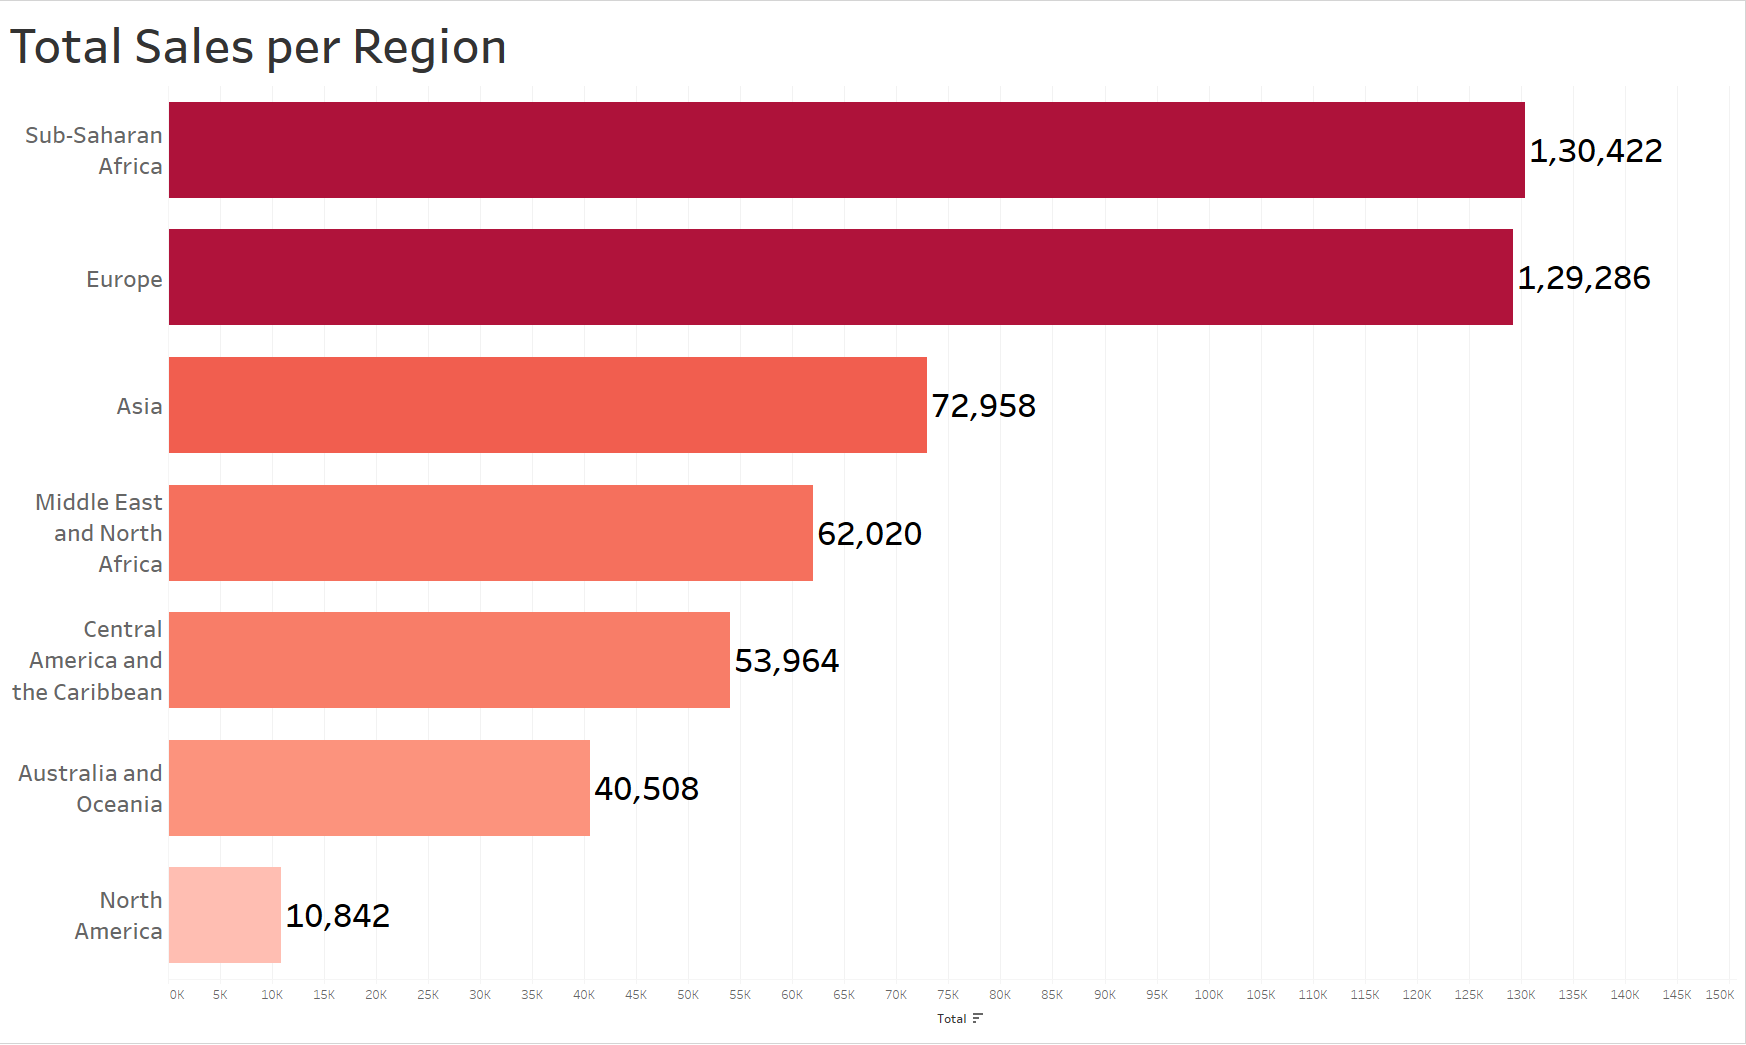

In [ ]:
df_country = pd.DataFrame(df['country'].value_counts()).reset_index()
df_country.rename(columns = {'index':'country', 'country':'total'}, inplace = True)
df_country = df_country.sort_values('total', ascending = True).reset_index(drop = True)

In [176]:
df_country.to_csv('sales_by_country.csv')

In [ ]:
df_country

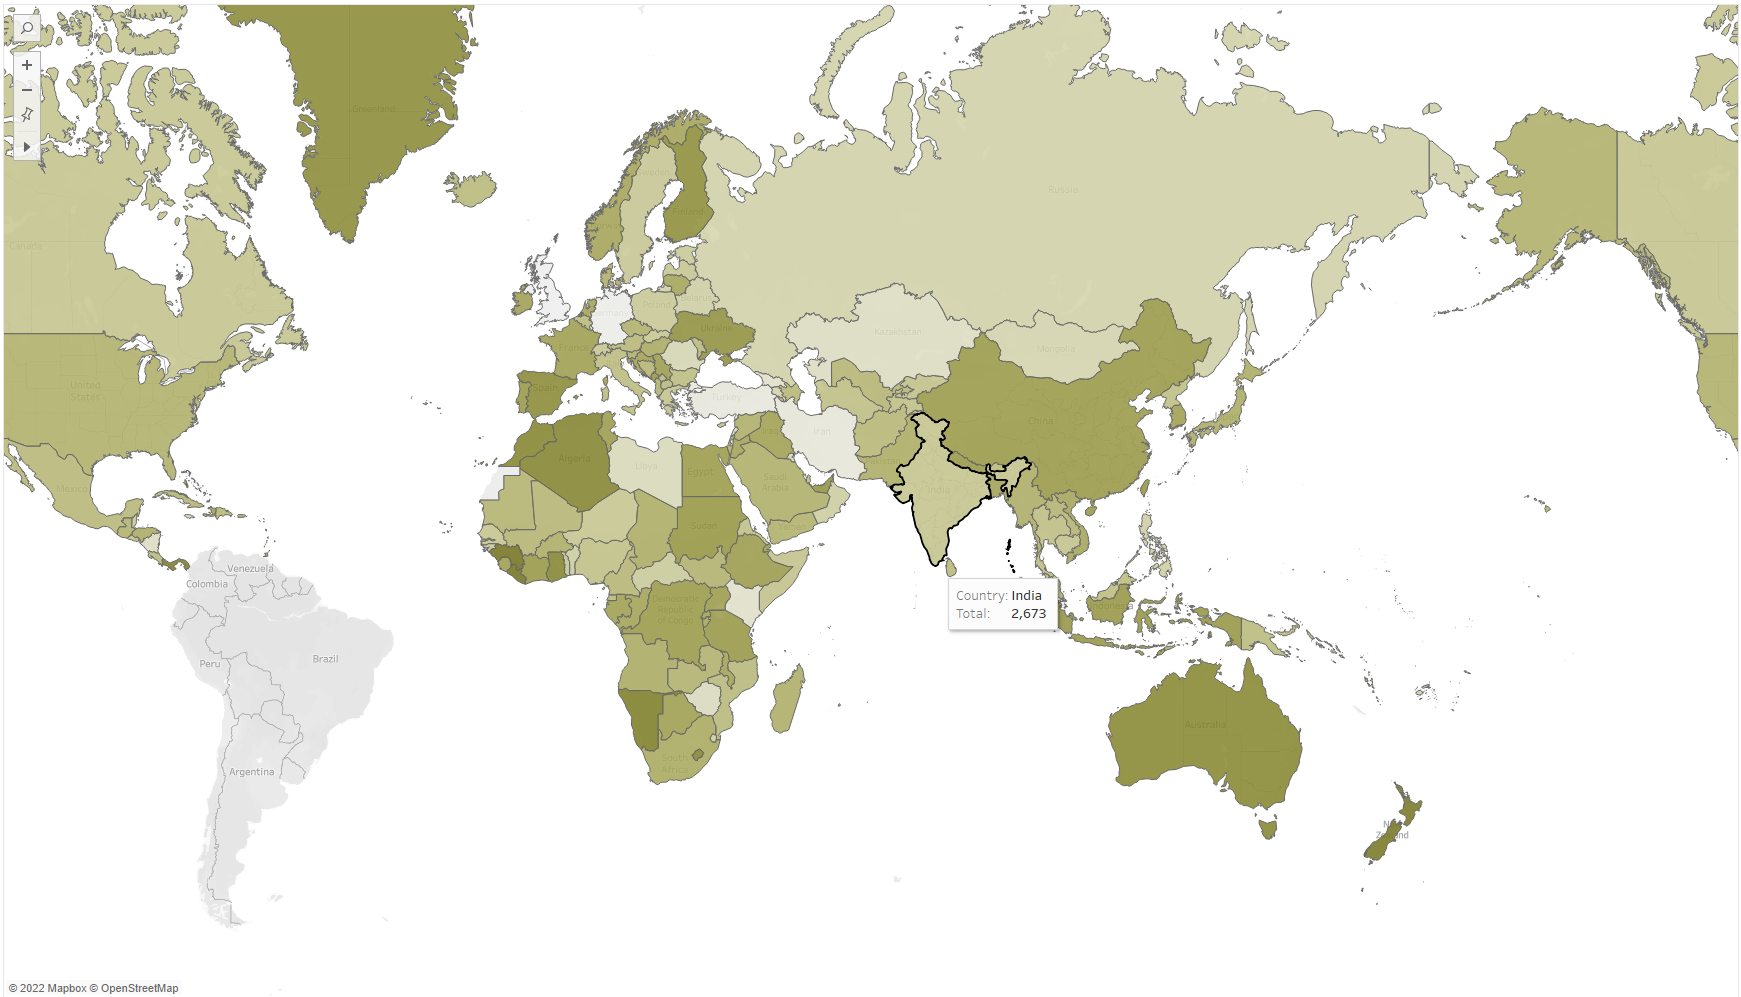